In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

plt.style.use('fivethirtyeight')

%matplotlib inline

params = {'legend.fontsize': 14,
          'figure.figsize': (15, 8),
         'axes.labelsize': 14,
         'axes.titlesize':14,
         'xtick.labelsize':14,
         'ytick.labelsize':14,
         'axes.facecolor': 'white',
         'axes.edgecolor': 'white',
         'axes.grid': 'False',
         'figure.facecolor': 'white'}
plt.rcParams.update(params)

In [2]:
# Leer datos de volumen y precio de mercancias de Mercamadrid en 2019 obtenidos del ayto de Madrid 
volpre = pd.read_csv('201908_volpre.csv',encoding = 'iso-8859-1',delimiter = ';', decimal = ',')
volpre.columns=['FecDesde','FecHasta','CodVariedad','Variedad','CodOrigen','Origen','Q','Pfre','Pmax','Pmin']
volpre.tail()

,FecDesde,FecHasta,CodVariedad,Variedad,CodOrigen,Origen,Q,Pfre,Pmax,Pmin
24593,20190601,20190630,P6 9601,ELABORADOS CONGELADOS CONG,65,HOLANDA,20960,0.0,0.0,0.00
24594,20190601,20190630,P6 9601,ELABORADOS CONGELADOS CONG,67,IRLANDA,8900,0.0,0.0,0.00
24595,20190601,20190630,P6 9601,ELABORADOS CONGELADOS CONG,69,PORTUGAL,23778,0.0,0.0,0.00
24596,20190601,20190630,P6 9601,ELABORADOS CONGELADOS CONG,70,DINAMARCA,8300,0.0,0.0,0.00
24597,20190601,20190630,P6 A101,HALIBUT CONGELADO CONG,45,TOLEDO,511,3.3,3.5,3.25


In [3]:
volpre['Cod1'] = volpre['CodVariedad'].apply(lambda x: x[0:2])
volpre['Cod2'] = volpre['CodVariedad'].apply(lambda x: x[3:7])
volpre['Variedad'] = volpre['Variedad'].apply(lambda x: x.strip())
volpre['Origen'] = volpre['Origen'].apply(lambda x: x.strip())
volpre['PxQ']= volpre['Q'] * volpre['Pfre']



In [4]:
# Kilos de producto que llegan de España
Qesp = volpre[volpre['CodOrigen'] <= 50]['Q'].sum()

# Kilos de producto que llegan de otros países
Qotros = volpre[volpre['CodOrigen'] > 50]['Q'].sum()

print(Qesp, Qotros, Qesp/Qotros)

941523600 273554334 3.44181569428178


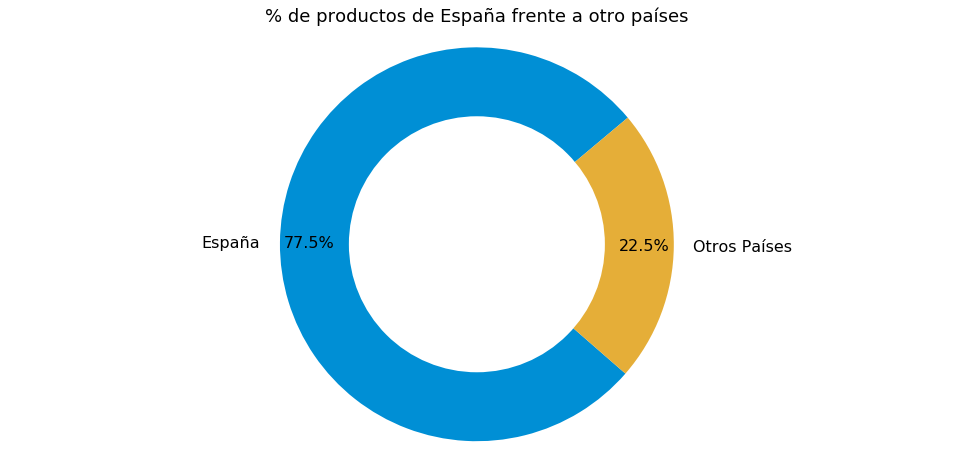

In [7]:
# Pie chart
labels = ['España', 'Otros Países']
sizes = [Qesp, Qotros]
#colors
colors = [sns.color_palette()[0],sns.color_palette()[2]]
#explsion
#explode = (0.05,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=40, pctdistance=0.85,
        textprops={'fontsize': 16})
#draw circle
centre_circle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.title('% de productos de España frente a otro países',fontsize= 18)
plt.savefig('images/ratio-producto.png', bbox_inches='tight', pad_inches=0.3, dpi=220,facecolor='white')
plt.show()

In [8]:
Origenes = np.asarray(sorted(volpre['CodOrigen'].unique()))
provincias = Origenes[Origenes <= 50]
paises = Origenes[Origenes > 50]


In [9]:
# Ordenar provincias según el volumen de producto
data = []
for provincia in provincias:
    Origen = volpre[volpre['CodOrigen']== provincia]['Origen'].iloc[0]
    Qorigen = volpre[volpre['CodOrigen']== provincia]['Q'].sum()
    ProvinciaPrecio = volpre[(volpre['CodOrigen']== provincia) & (volpre['Pfre'] >0)]
    PrecioMedio = ProvinciaPrecio['PxQ'].sum() / ProvinciaPrecio['Q'].sum()
    data.append([Origen,Qorigen,PrecioMedio])
    QxOrigen = pd.DataFrame(data,columns=['Origen','Q','Pmedio'])
QxOrigen = QxOrigen.sort_values(by=['Q'], ascending=True)

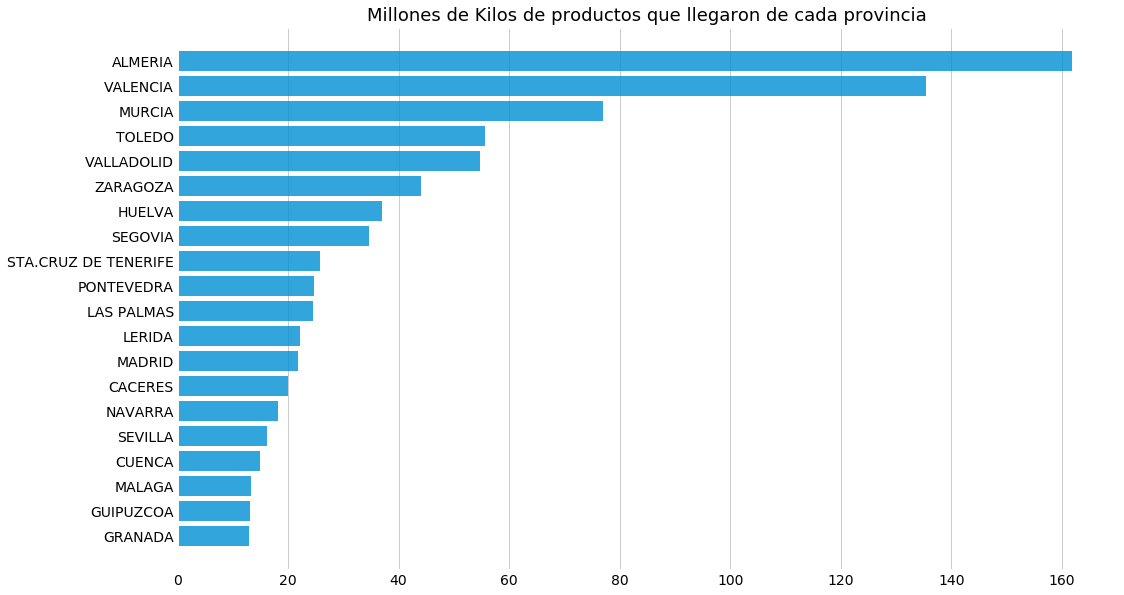

In [10]:
# Gráfico de provincias según el volumen de producto

x = QxOrigen['Origen'].tail(20)
y = QxOrigen['Q'].tail(20)/1000000

plt.figure(figsize=(15,10))
plt.barh(x, y, alpha=0.8, color=sns.color_palette()[0])

plt.grid(axis='x')
plt.title('Millones de Kilos de productos que llegaron de cada provincia',fontsize= 18)
plt.savefig('images/volumen-producto-provincia.png', bbox_inches='tight', pad_inches=0.3, dpi=220,facecolor='white')
plt.show()

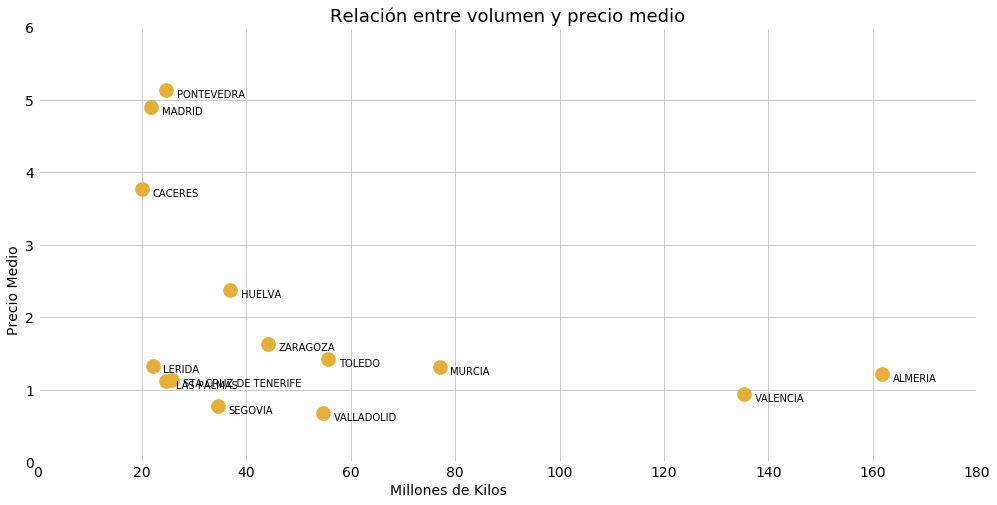

In [11]:
# Gráfico de volumen sobre precio medio ( de las provincias que venden mas de 20 millones de kilos)
Qx20 = QxOrigen[QxOrigen['Q']>=19000000].reset_index()
x = Qx20['Q']/1000000
y = Qx20['Pmedio']
word= Qx20['Origen']
plt.scatter(x, y, s =200, alpha=1, color=sns.color_palette()[2])
for i in range(0,len(x)): 
    plt.text(x[i]+2, y[i]-0.1, word[i], fontsize=10)

plt.grid(axis='y')
plt.grid(axis='x')
plt.axis(xmin= 0 , xmax=180)
plt.axis(ymin= 0 , ymax=6)
plt.xlabel('Millones de Kilos', rotation=0, ha = 'right')
plt.ylabel('Precio Medio', rotation=90, ha = 'right')
plt.title('Relación entre volumen y precio medio',fontsize= 18)
plt.savefig('images/volumen-precio-provincia.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()    

In [12]:
# Ordenar paises según el volumen de producto
data = []
for pais in paises:
    Origen = volpre[volpre['CodOrigen']== pais]['Origen'].iloc[0]
    Qorigen = volpre[volpre['CodOrigen']== pais]['Q'].sum()
    PaisPrecio = volpre[(volpre['CodOrigen']== pais) & (volpre['Pfre'] >0)]
    PrecioMedio = PaisPrecio['PxQ'].sum() / PaisPrecio['Q'].sum()
    data.append([Origen,Qorigen,PrecioMedio])
    QxOrigen = pd.DataFrame(data,columns=['Origen','Q','Pmedio'])
QxOrigen = QxOrigen.sort_values(by=['Q'], ascending=True)

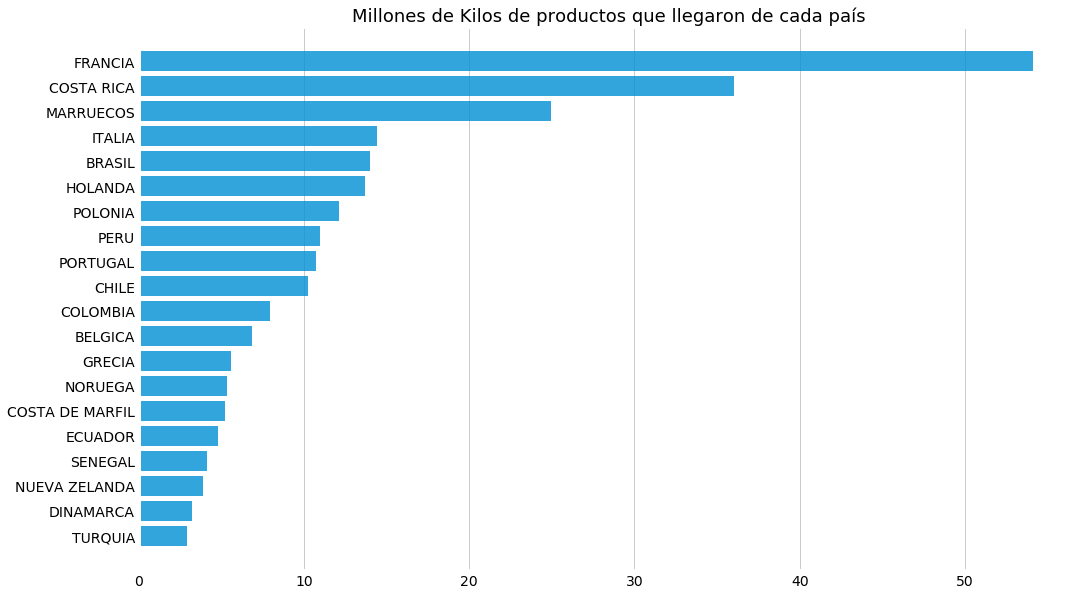

In [13]:
# Gráfico de primeros 20 países según el volumen de producto

x = QxOrigen['Origen'].tail(20)
y = QxOrigen['Q'].tail(20)/1000000

plt.figure(figsize=(15,10))
plt.barh(x, y, alpha=0.8, color=sns.color_palette()[0])

plt.grid(axis='x')
plt.title('Millones de Kilos de productos que llegaron de cada país',fontsize= 18)
plt.savefig('images/volumen-producto-pais.png', bbox_inches='tight', pad_inches=0.3, dpi=220,facecolor='white')
plt.show()

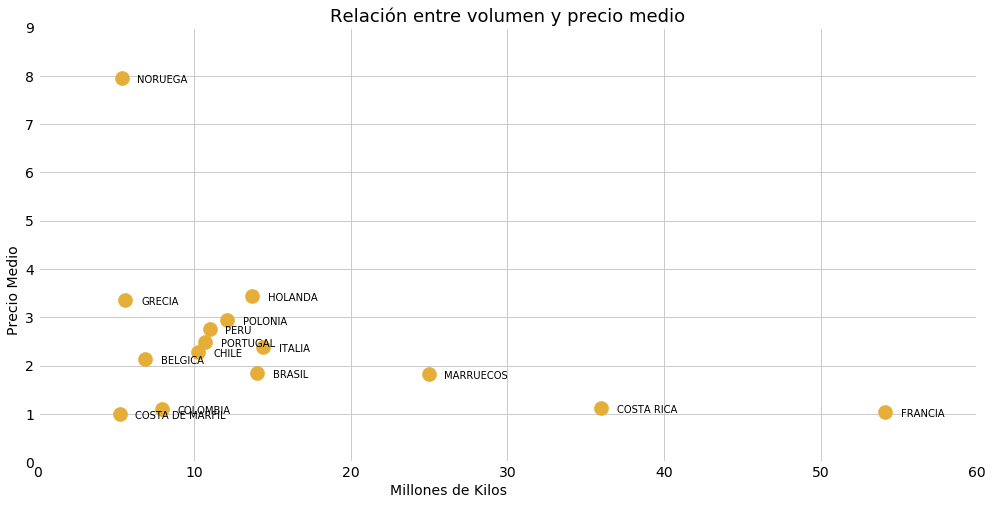

In [14]:
# Gráfico de volumen sobre precio medio ( de los países que venden mas de 5 millones de kilos)
Qx20 = QxOrigen[QxOrigen['Q']>=5000000].reset_index()
x = Qx20['Q']/1000000
y = Qx20['Pmedio']
word= Qx20['Origen']
plt.scatter(x, y, s =200, alpha=1, color=sns.color_palette()[2])
for i in range(0,len(x)): 
    plt.text(x[i]+1, y[i]-0.1, word[i], fontsize=10)

plt.grid(axis='y')
plt.grid(axis='x')
plt.axis(xmin= 0 , xmax=60)
plt.axis(ymin= 0 , ymax=9)
plt.xlabel('Millones de Kilos', rotation=0, ha = 'right')
plt.ylabel('Precio Medio', rotation=90, ha = 'right')
plt.title('Relación entre volumen y precio medio',fontsize= 18)
plt.savefig('images/volumen-precio-pais.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()    